In [29]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\just_peppers\data",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\just_peppers\data", target_size=(224,224))

Found 2475 images belonging to 2 classes.
Found 2475 images belonging to 2 classes.


In [7]:
traindata.class_indices

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1}

In [8]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 15s 0us/step


In [9]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [13]:
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(vggmodel.input,predictions)

In [15]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

In [16]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("vgg16_1.h5")

C:\Users\Jordan Lankford\AppData\Local\Temp\ipykernel_22356\650987539.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])


Epoch 1/100
2/2 [==============================] - 30s 18s/step - loss: 0.7999 - accuracy: 0.5938 - val_loss: 0.8216 - val_accuracy: 0.5938
Epoch 2/100
2/2 [==============================] - 26s 17s/step - loss: 0.6731 - accuracy: 0.6719 - val_loss: 0.4276 - val_accuracy: 0.8438
Epoch 3/100
2/2 [==============================] - 27s 18s/step - loss: 0.6011 - accuracy: 0.7031 - val_loss: 0.5317 - val_accuracy: 0.7188
Epoch 4/100
2/2 [==============================] - 26s 17s/step - loss: 0.3424 - accuracy: 0.8438 - val_loss: 0.3160 - val_accuracy: 0.8438
Epoch 5/100
2/2 [==============================] - 26s 17s/step - loss: 0.2807 - accuracy: 0.9219 - val_loss: 0.0653 - val_accuracy: 0.9688
Epoch 6/100
2/2 [==============================] - 26s 17s/step - loss: 0.2817 - accuracy: 0.8750 - val_loss: 0.1707 - val_accuracy: 0.9375
Epoch 7/100
2/2 [==============================] - 27s 18s/step - loss: 0.2114 - accuracy: 0.9062 - val_loss: 0.4240 - val_accuracy: 0.8438
Epoch 8/100
2/2 [===

1/1 [==============================] - 0s 430ms/step
[[9.9914813e-01 8.5181382e-04]]
Not healthy


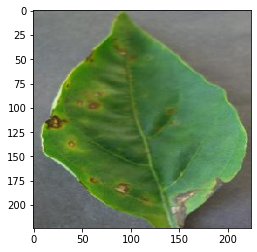

In [41]:
from keras.preprocessing import image
img = keras.utils.load_img(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\just_peppers\predict\not2.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/just_peppers/my_model_usingsave.h5")
output = saved_model.predict(img)
print(output)
if output[0][0] < output[0][1]:
    print("healthy")
else:
    print('Not healthy')

In [42]:
print(test_acc)

NameError: name 'test_acc' is not defined

In [18]:
model_final.save("my_model_usingsave.h5")